In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***`LIBRARIES`***

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline
!pip install category_encoders
!pip install joblib
!pip install scipy
!pip install --upgrade scikit-learn
!pip install xgboost==1.7.5  # Replace with a compatible version


  Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Using cached xgboost-1.7.5-py3-none-manylinux2014_x86_64.whl.metadata (1.9 kB)
Using cached xgboost-1.7.5-py3-none-manylinux2014_x86_64.whl (200.3 MB)
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.6
    Uninstalling xgboost-1.7.6:
      Successfully uninstalled xgboost-1.7.6


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import recall_score, classification_report, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from scipy.stats.mstats import winsorize


# ***`READ DATA`***

In [ ]:
excel_file_path = "/content/drive/My Drive/Colab Notebooks/NCKH (Mr. Hiếu)/CleanedData.xlsx"
df = pd.read_excel(excel_file_path)

In [ ]:
# column_to_analyze = ["Gender", "YearOfLearning", "UniversityName",
#     "GroupMajor", "Major", "GradeRank", "UseGPT?", "GradeTrend(GPT)",
#     "FrequencyUse(GPT)", "UsageBeyondAcademics", "TimeUsage(1day)",
#                      "DifferentWebsites", "Priority", "Reliability", "ResultofGPT",
#     "InfluenceofGPT", "SatisfactionLevel", "Relevance", "Inspire&Motivate",
#     "PositiveInfluence", "NegativeInfluence", "Effective", "ReplaceTeacher",
#     "SpeechDoExam", "Dependence&Constraint", "LazyStudy&Think", "ImproveStudy",
#     "SatisfiedResult", "MechanismOfAction", "EasyToUnderstand", "CompareGoogle",
#     "FindJob", "WaytoAsk"]
# df_copy = df[column_to_analyze]
# df_copy.keys()

In [ ]:
column_to_analyze = ["Gender", "YearOfLearning", "UniversityName", "Major", "GradeRank", "UseGPT?", "GradeTrend(GPT)",
                    "UsageInAcademics", "UsageBeyondAcademics", "AvgTimeUsage(1day)", "Priority", "Reliability", "ResultofGPT",
                    "InfluenceofGPT", "SatisfactionLevel", "Relevance", "Inspire&Motivate",
                    "PositiveInfluence", "NegativeInfluence", "Effective", "ReplaceTeacher",
                    "SpeechDoExam", "Dependence&Constraint", "LazyStudy&Think", "ImproveStudy",
                    "SatisfiedResult", "MechanismOfAction", "EasyToUnderstand", "CompareGoogle",
                    "FindJob", "WaytoAsk"]
df_copy = df[column_to_analyze]
df_copy.keys()

Index(['Gender', 'YearOfLearning', 'UniversityName', 'Major', 'GradeRank',
       'UseGPT?', 'GradeTrend(GPT)', 'UsageInAcademics',
       'UsageBeyondAcademics', 'AvgTimeUsage(1day)', 'Priority', 'Reliability',
       'ResultofGPT', 'InfluenceofGPT', 'SatisfactionLevel', 'Relevance',
       'Inspire&Motivate', 'PositiveInfluence', 'NegativeInfluence',
       'Effective', 'ReplaceTeacher', 'SpeechDoExam', 'Dependence&Constraint',
       'LazyStudy&Think', 'ImproveStudy', 'SatisfiedResult',
       'MechanismOfAction', 'EasyToUnderstand', 'CompareGoogle', 'FindJob',
       'WaytoAsk'],
      dtype='object')

# ***`Missing Values`***

In [ ]:
null_values = df_copy.isnull().sum()
null_values

,0
Gender,0
YearOfLearning,0
UniversityName,0
Major,0
GradeRank,0
UseGPT?,0
GradeTrend(GPT),0
UsageInAcademics,0
UsageBeyondAcademics,0
AvgTimeUsage(1day),0


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 857 non-null    object
 1   YearOfLearning         857 non-null    int64 
 2   UniversityName         857 non-null    object
 3   Major                  857 non-null    object
 4   GradeRank              857 non-null    int64 
 5   UseGPT?                857 non-null    int64 
 6   GradeTrend(GPT)        857 non-null    int64 
 7   UsageInAcademics       857 non-null    int64 
 8   UsageBeyondAcademics   857 non-null    int64 
 9   AvgTimeUsage(1day)     857 non-null    int64 
 10  Priority               857 non-null    int64 
 11  Reliability            857 non-null    int64 
 12  ResultofGPT            857 non-null    int64 
 13  InfluenceofGPT         857 non-null    int64 
 14  SatisfactionLevel      857 non-null    int64 
 15  Relevance              

# **`Encoding`**

In [ ]:
df_copy.head(2)

,Gender,YearOfLearning,UniversityName,Major,GradeRank,UseGPT?,GradeTrend(GPT),UsageInAcademics,UsageBeyondAcademics,AvgTimeUsage(1day),...,SpeechDoExam,Dependence&Constraint,LazyStudy&Think,ImproveStudy,SatisfiedResult,MechanismOfAction,EasyToUnderstand,CompareGoogle,FindJob,WaytoAsk
0,Nữ,2,Đại học Công nghệ TP.HCM (HUTECH),Công nghệ thông tin,5,1,3,5,5,1,...,1,3,3,3,3,3,3,Google,3,3
1,Nam,4,Đại học Công nghệ TP.HCM (HUTECH),Công nghệ thông tin,5,1,3,4,5,1,...,1,4,5,5,4,5,4,ChatGPT,4,5


In [ ]:
encoder_features = ['Gender', 'UniversityName', 'Major', 'CompareGoogle']

for feature in encoder_features:
    label_encoding = LabelEncoder()
    df_copy[feature] = label_encoding.fit_transform(df_copy[feature])

# ***`VIF`***

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor # Import the function

# Thêm hằng số (constant) vào dữ liệu để sử dụng VIF
X = sm.add_constant(df_copy.drop(columns=['UseGPT?'])) # Use sm.add_constant
# Convert all columns to numeric if possible, otherwise handle non-numeric columns
X = X.apply(pd.to_numeric, errors='coerce') # Convert to numeric, replace errors with NaN
X = X.dropna(axis=1) # Drop columns with NaNs (non-numeric)

# Tính toán VIF cho từng biến
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Hiển thị kết quả
print(vif_data)

                 Variable        VIF
0                   const  58.908515
1                  Gender   1.131370
2          YearOfLearning   1.109460
3          UniversityName   1.041484
4                   Major   1.115051
5               GradeRank   1.078031
6         GradeTrend(GPT)   1.155358
7        UsageInAcademics   3.004551
8    UsageBeyondAcademics   2.543464
9      AvgTimeUsage(1day)   1.460179
10               Priority   1.733214
11            Reliability   2.559657
12            ResultofGPT   3.350090
13         InfluenceofGPT   2.220743
14      SatisfactionLevel   3.634143
15              Relevance   2.869275
16       Inspire&Motivate   2.456908
17      PositiveInfluence   2.560764
18      NegativeInfluence   1.633412
19              Effective   2.814861
20         ReplaceTeacher   1.598540
21           SpeechDoExam   1.571738
22  Dependence&Constraint   1.762672
23        LazyStudy&Think   1.560838
24           ImproveStudy   2.605193
25        SatisfiedResult   2.683509
2

# ***`Check Unballance Target features`***

In [ ]:
pd.crosstab(df_copy['UseGPT?'],df_copy['UseGPT?'], normalize='all')*100

UseGPT?,0,1
UseGPT?,,
0,28.121354,0.000000
1,0.000000,71.878646


In [ ]:
# Shuffle toàn bộ DataFrame
df_copy = df_copy.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
X = df_copy.drop(columns = ['UseGPT?'])
y = df_copy['UseGPT?']

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
# Áp dụng SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# ***`Train/Test Split`***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [ ]:
train_class_counts = pd.Series(y_train).value_counts()

# Đếm số lượng các lớp trong y_test
test_class_counts = pd.Series(y_test).value_counts()

# In kết quả
print("Train Class Counts:")
print(train_class_counts)

print("\nTest Class Counts:")
print(test_class_counts)

Train Class Counts:
UseGPT?
0    436
1    426
Name: count, dtype: int64

Test Class Counts:
UseGPT?
1    190
0    180
Name: count, dtype: int64


# ***`Normalization`***

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [ ]:
X_train_scaled.head()

,Gender,YearOfLearning,UniversityName,Major,GradeRank,GradeTrend(GPT),UsageInAcademics,UsageBeyondAcademics,AvgTimeUsage(1day),Priority,...,SpeechDoExam,Dependence&Constraint,LazyStudy&Think,ImproveStudy,SatisfiedResult,MechanismOfAction,EasyToUnderstand,CompareGoogle,FindJob,WaytoAsk
0,0.5,0.00,0.729730,0.358333,0.833333,1.0,0.00,0.00,0.000000,0.0,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.666667,0.00,0.00
1,1.0,0.50,0.405405,0.633333,0.833333,0.5,0.25,0.50,0.000000,0.5,...,0.000000,0.50,0.50,0.50,0.50,0.25,1.00,0.333333,0.75,0.50
2,0.5,0.50,0.162162,0.358333,0.666667,1.0,0.25,0.75,0.000000,0.0,...,0.666667,0.25,1.00,0.75,0.25,0.25,0.75,1.000000,0.75,0.25
3,1.0,0.75,0.432432,0.633333,0.666667,1.0,1.00,1.00,0.333333,1.0,...,0.666667,0.75,0.75,0.75,0.75,0.75,0.50,1.000000,1.00,0.75
4,0.5,0.00,0.378378,0.450000,0.166667,0.5,0.00,0.00,0.000000,0.0,...,0.333333,0.25,0.50,0.50,0.50,0.50,0.50,0.666667,0.50,0.50


In [ ]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


# ***`XGBoost`***

In [ ]:
!pip install --upgrade xgboost scikit-learn


  Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.5
    Uninstalling xgboost-1.7.5:
      Successfully uninstalled xgboost-1.7.5


In [ ]:
!pip show xgboost scikit-learn
!pip install xgboost==1.7.6 scikit-learn==1.2.2


Name: xgboost
Version: 2.1.3
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, nvidia-nccl-cu12, scipy
Required-by: 
---
Name: scikit-learn
Version: 1.6.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
         
         Copyright (c) 2007-2024 The scikit-learn developers.
         All rights reserved.
         
         Redistribution and use in source and binary forms, with or without
         modification, are permitted provided that the following conditions are met:
         
         * Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
         
         * Redistributions in binary form must reproduce the abov

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Tạo DMatrix từ dữ liệu
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Cài đặt tham số cho phân loại nhị phân
params = {
    'objective': 'binary:logistic',  # Phân loại nhị phân
    'eval_metric': 'logloss',  # Metric đo lường log-loss
    'seed': 42  # Đảm bảo kết quả lặp lại được
}

# Huấn luyện mô hình
num_round = 100  # Số vòng huấn luyện
bst = xgb.train(params, dtrain, num_round)

# Dự đoán trên tập kiểm tra
predictions = bst.predict(dtest)

# Chuyển đổi xác suất thành nhãn (0 hoặc 1)
threshold = 0.5
binary_predictions = (predictions >= threshold).astype(int)

# Hiển thị báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, binary_predictions))

# In confusion matrix để kiểm tra kết quả phân loại
print('Confusion Matrix:')
print(confusion_matrix(y_test, binary_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       180
           1       0.91      0.88      0.90       190

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370

Confusion Matrix:
[[163  17]
 [ 22 168]]


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Chuẩn bị dữ liệu DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Lưới tham số
# Lưới tham số
param_grid_sbg = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

best_score = float('inf')
best_params = None

# Tìm kiếm thông số tốt nhất thủ công
for lr in param_grid_sbg['learning_rate']:
    for depth in param_grid_sbg['max_depth']:
        for child_weight in param_grid_sbg['min_child_weight']:
            for subsample in param_grid_sbg['subsample']:
                for colsample in param_grid_sbg['colsample_bytree']:
                    params = {
                        'objective': 'multi:softmax',
                        'num_class': 3,
                        'eval_metric': 'merror',
                        'learning_rate': lr,
                        'max_depth': depth,
                        'min_child_weight': child_weight,
                        'subsample': subsample,
                        'colsample_bytree': colsample,
                        'seed': 42
                    }
                    cv_results = xgb.cv(
                        params,
                        dtrain,
                        num_boost_round=100,
                        nfold=5,
                        early_stopping_rounds=10,
                        metrics='merror',
                        as_pandas=True
                    )
                    mean_error = cv_results['test-merror-mean'].min()
                    if mean_error < best_score:
                        best_score = mean_error
                        best_params = params

print("Best Parameters:", best_params)

# Huấn luyện mô hình tốt nhất
final_model = xgb.train(best_params, dtrain, num_boost_round=100)

# Dự đoán trên tập kiểm tra
predictions = final_model.predict(dtest)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision (Macro): {precision:.4f}')
print(f'Recall (Macro): {recall:.4f}')
print(f'F1 Score (Macro): {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)


Best Parameters: {'objective': 'multi:softmax', 'num_class': 3, 'eval_metric': 'merror', 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.8, 'seed': 42}
Accuracy: 0.8811
Precision (Macro): 0.8810
Recall (Macro): 0.8813
F1 Score (Macro): 0.8810
Confusion Matrix:
[[160  20]
 [ 24 166]]


In [ ]:
expected = y_test
# Replace grid_search_xgb with final_model
predicted = final_model.predict(xgb.DMatrix(X_test_scaled)) # Convert X_test_scaled to DMatrix
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       180
           1       0.89      0.87      0.88       190

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370

[[160  20]
 [ 24 166]]


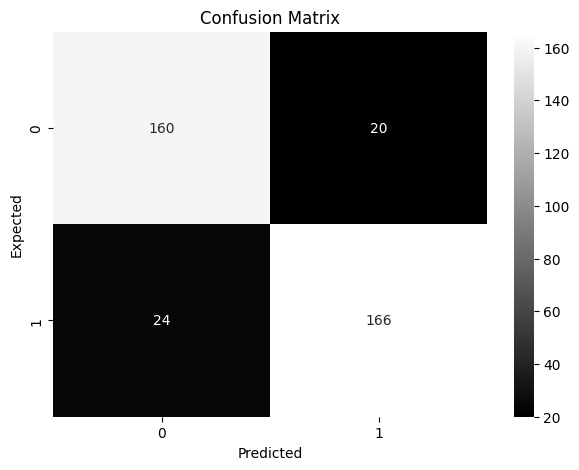

In [ ]:
# Generate confusion matrix
cm = metrics.confusion_matrix(expected, predicted)

# Plot confusion matrix in black and white
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='gray')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


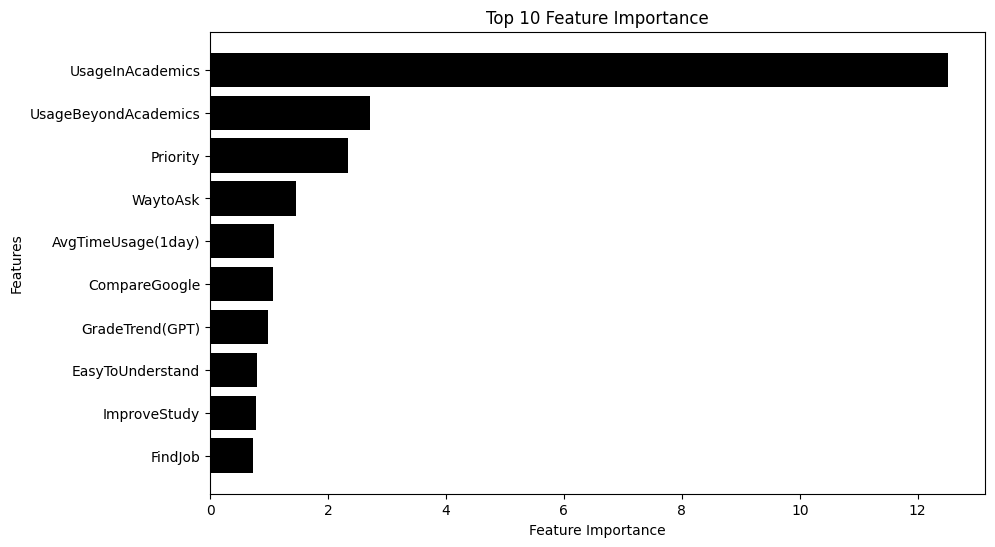

In [ ]:
# Vẽ biểu đồ top 10 feature importance
importance = final_model.get_score(importance_type='gain')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
top_10_features = sorted_importance[:10]

features = [item[0] for item in top_10_features]
values = [item[1] for item in top_10_features]

plt.figure(figsize=(10, 6))
plt.barh(features, values, color='black')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.show()

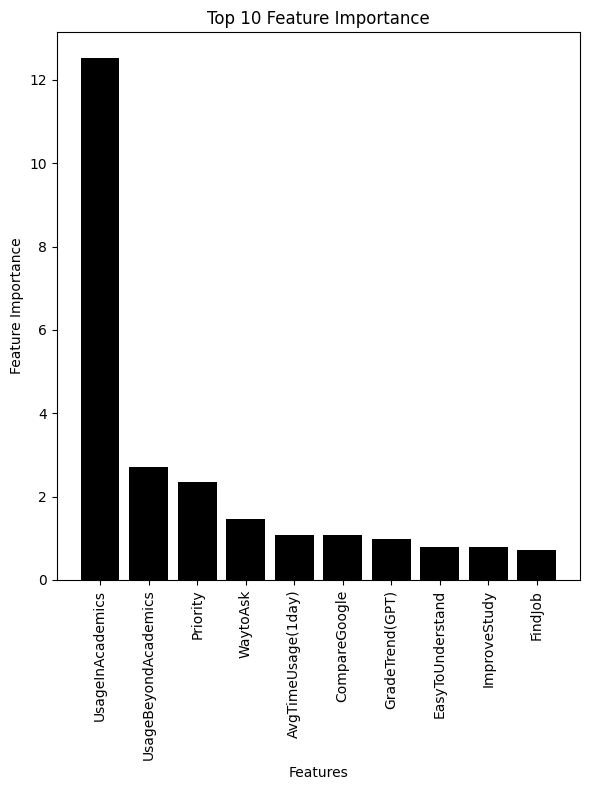

In [ ]:
import matplotlib.pyplot as plt

# Data
importance = final_model.get_score(importance_type='gain')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
top_10_features = sorted_importance[:10]

features = [item[0] for item in top_10_features]
values = [item[1] for item in top_10_features]

# Plot
plt.figure(figsize=(6, 8))
plt.bar(features, values, color='black')  # Change to vertical bars
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top 10 Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


# ***`Random Forest`***

In [ ]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
expected = y_test
predicted = RF_classifier.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_RF= metrics.confusion_matrix(expected, predicted)
print(cm_RF)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       180
           1       0.92      0.86      0.89       190

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370

[[165  15]
 [ 26 164]]


Text(0.5, 1.0, 'Confusion Matrix')

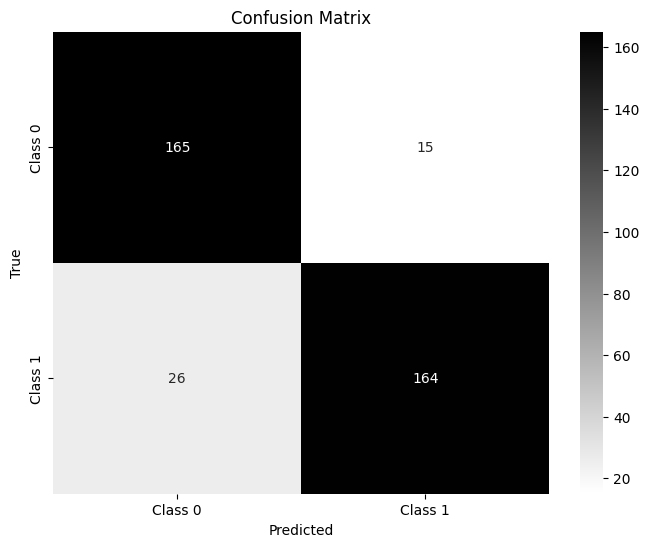

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_RF, annot=True, fmt="d", cmap="binary", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# ***`Grid Search RF `***

Sau khi tuning sử dụng ballance sampling thì cũng thế so với khi chưa tuning

In [ ]:

param_grid = {
    'n_estimators': [10,25,30,50,100,200],
    'max_depth': [2,3,5,10,20],
    'criterion':['entropy','gini'],
    'min_samples_leaf': [5,10,20,50,100,200],
    'min_samples_split': [2, 5, 10],
}

# Tạo đối tượng GridSearchCV
grid_search_RF = GridSearchCV(estimator=RF_classifier,
                           param_grid=param_grid,
                           n_jobs=-1,
                           cv = 5,
                           verbose=1,
                           scoring="accuracy")

grid_search_RF.fit(X_train_scaled, y_train)
grid_search_RF.best_estimator_


Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=25)

In [ ]:
expected = y_test
predicted = grid_search_RF.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_grid_search_RF = metrics.confusion_matrix(expected, predicted)
print(cm_grid_search_RF)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       180
           1       0.87      0.86      0.86       190

    accuracy                           0.86       370
   macro avg       0.86      0.86      0.86       370
weighted avg       0.86      0.86      0.86       370

[[155  25]
 [ 27 163]]


Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

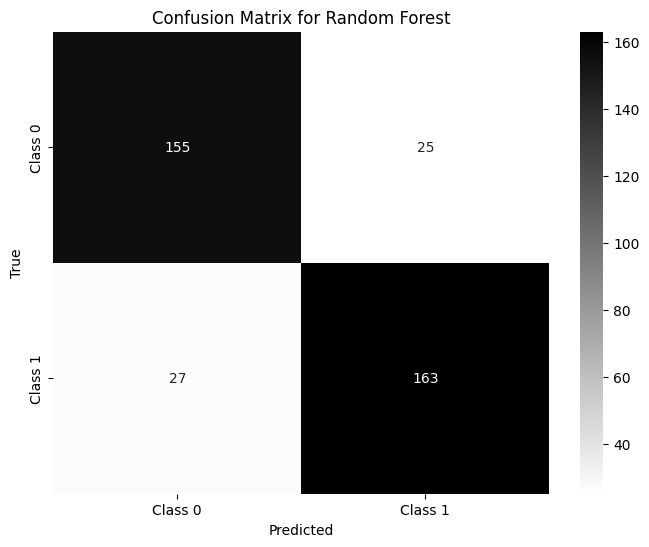

In [ ]:
# Vẽ ma trận nhầm lẫn dưới dạng hình ảnh đen trắng, đáp ứng yêu cầu bài báo
plt.figure(figsize=(8, 6))
sns.heatmap(cm_grid_search_RF, annot=True, fmt="d", cmap="binary", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')

# ***`Logistic Regression`***

In [ ]:
!pip install mord

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9886 sha256=0f0029f7b71cfcc7293f695cc712ebd5caeb54054972756844f7253ad4191e86
  Stored in directory: /root/.cache/pip/wheels/77/00/19/3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord


In [ ]:
from sklearn.linear_model import LogisticRegression

# Tạo và huấn luyện mô hình Logistic Regression
LR_model = LogisticRegression(random_state=42)
LR_model.fit(X_train_scaled, y_train)

expected = y_test
predicted = LR_model.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_LR= metrics.confusion_matrix(expected, predicted)
print(cm_LR)


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       180
           1       0.87      0.85      0.86       190

    accuracy                           0.85       370
   macro avg       0.85      0.85      0.85       370
weighted avg       0.85      0.85      0.85       370

[[155  25]
 [ 29 161]]


In [ ]:
param_grid_LR = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Create the GridSearchCV object
grid_search_LR = GridSearchCV(estimator=LR_model, param_grid=param_grid_LR, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search_LR.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search_LR.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search_LR.best_score_ * 100))

# Evaluate the model on the test set
test_accuracy = grid_search_LR.score(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Best Parameters:  {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy: 86.32%
Test Accuracy: 85.68%


In [ ]:
expected = y_test
predicted = grid_search_LR.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_grid_search_RF = metrics.confusion_matrix(expected, predicted)
print(cm_grid_search_RF)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       180
           1       0.87      0.85      0.86       190

    accuracy                           0.86       370
   macro avg       0.86      0.86      0.86       370
weighted avg       0.86      0.86      0.86       370

[[156  24]
 [ 29 161]]


# **`SVM`**

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)


SVC()

In [ ]:
expected = y_test
predicted = svm_classifier.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
cm_grid_search_RF = metrics.confusion_matrix(expected, predicted)
print(cm_grid_search_RF)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       180
           1       0.88      0.87      0.88       190

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370

[[158  22]
 [ 24 166]]


In [ ]:
param_grid_SVM = {
    'C': [0.1, 0.5, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

# Create the GridSearchCV object
grid_search_SVM = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_SVM, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search_SVM.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search_SVM.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search_SVM.best_score_ * 100))

# Evaluate the model on the test set
test_accuracy = grid_search_SVM.score(X_test_scaled, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Best Parameters:  {'C': 0.5, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 87.24%
Test Accuracy: 87.03%


In [ ]:
expected = y_test
predicted = grid_search_SVM.predict(X_test_scaled)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       180
           1       0.87      0.88      0.87       190

    accuracy                           0.87       370
   macro avg       0.87      0.87      0.87       370
weighted avg       0.87      0.87      0.87       370

[[155  25]
 [ 23 167]]


# ***`ANN`***

In [ ]:
!pip install scikeras # Install scikeras
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier # Import KerasClassifier from scikeras

In [ ]:
# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),  # Changed input_dim to match number of features
    tf.keras.layers.Dense(64, activation='relu'),                 # Second hidden layer
    tf.keras.layers.Dense(32, activation='relu'),                 # Third hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')                # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate the model on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5796 - loss: 0.6915 - val_accuracy: 0.8266 - val_loss: 0.5744
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8419 - loss: 0.5314 - val_accuracy: 0.8671 - val_loss: 0.4310
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8420 - loss: 0.4143 - val_accuracy: 0.8324 - val_loss: 0.4101
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8612 - loss: 0.3770 - val_accuracy: 0.8555 - val_loss: 0.3952
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8566 - loss: 0.3433 - val_accuracy: 0.8728 - val_loss: 0.3550
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8626 - loss: 0.3455 - val_accuracy: 0.8786 - val_loss: 0.3368
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8841 - loss: 0.3193 - val_accuracy: 0.8902 - val_loss: 0.3400
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8690 - loss: 0.3120 - val_accuracy: 0.8728 - val_loss

In [ ]:
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       180
           1       0.87      0.88      0.87       190

    accuracy                           0.87       370
   macro avg       0.87      0.87      0.87       370
weighted avg       0.87      0.87      0.87       370

Confusion Matrix:
[[155  25]
 [ 23 167]]


In [ ]:
# Function to create the Keras model
def create_model(optimizer='adam', activation='relu'):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation=activation, input_dim=X_train_scaled.shape[1]),
        tf.keras.layers.Dense(64, activation=activation),
        tf.keras.layers.Dense(32, activation=activation),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
# Pass activation as a parameter to create_model
model = KerasClassifier(model=create_model, optimizer='adam', activation='relu', verbose=0)

# Define the parameter grid - remove activation
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'sgd'],
    # 'activation': ['relu', 'tanh']  # Remove this line
    'model__activation': ['relu', 'tanh']  # Add this line
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object
grid_result = grid.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding accuracy
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_result.best_score_}")

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Classification report
print(classification_report(y_test, y_pred))

Best Parameters: {'batch_size': 16, 'epochs': 20, 'model__activation': 'relu', 'optimizer': 'adam'}
Best Cross-Validation Accuracy: 0.8712730205672805
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       180
           1       0.89      0.85      0.87       190

    accuracy                           0.87       370
   macro avg       0.87      0.87      0.87       370
weighted avg       0.87      0.87      0.87       370

